### Name : Limalka Sadith
### Index No : 190538N

In [ ]:
#Q1
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('sudoku.png', cv.IMREAD_COLOR)

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
edges = cv.Canny(gray,50, 150, apertureSize=3)
lines = cv.HoughLines(edges, 1, np.pi/180, 200)

for line in lines:
    rho, theta = line[0]
    a = 


In [ ]:
#Q2
import cv2 as cv
import numpy as np
img = cv.imread('coins.jpg',cv.IMREAD_COLOR)
assert img is not None

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

circles = cv.HoughCircles(gray, cv.HOUGH_GRADIENT, 1, 50, param1 = 50, param2 = 30, minRadius=0, maxRadius=0)
circles = np.uint16(np.around(circles))




In [ ]:
#Q3
import cv2 as cv
import numpy as np

img = cv.imread('pic1.png', cv.IMREAD_REDUCED_GRAYSCALE_2)
temp1 = cv.imread('temp1.png', cv.IMREAD_REDUCED_GRAYSCALE_2)

im_edges = cv.Canny(img, 50, 250)
temp1_edges = cv.Canny(temp1, 505, 250)
alg = cv.createGeneralizedHoughGuil()
alg.setTemplate(temp1_edges)
alg.setAngleTresh(1000000)
alg.setScaleTresh(1000000)
alg.setPosTresh(1000)
alg.setPosTresh(1000)
alg.setPosTresh(1000)



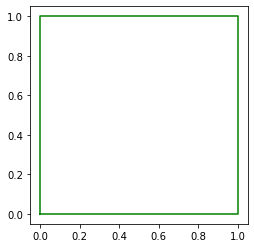

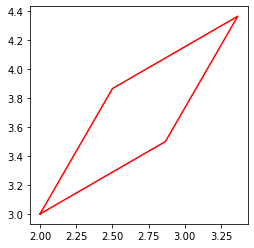

In [5]:
#Q4
import matplotlib.pyplot as plt
import numpy as np

a, b, c, d = [0, 0, 1],[0, 1, 1] ,[1, 1, 1] ,[1, 0, 1]

X = np.array([a,b,c,d]).T

x = np.append(X[0,:],X[0,0])
y = np.append(X[1,:],X[1,0])

theta = np.pi*30/180
tx, ty = 2, 3
s=1 
H = np.array([[s*np.cos(theta), s*np.sin(theta), tx], [s*np.sin(theta), s*np.cos(theta),ty], [0,0,1]])
Y = H @ X

fig, ax = plt.subplots()
ax.plot(x, y, color='g')
ax.set_aspect('equal')

fig, ax = plt.subplots()

ax.set_aspect('equal')

x = np.append(Y[0,:],Y[0,0])
y = np.append(Y[1,:],Y[1,0])

ax.plot(x, y, color='r')

plt.show()

In [ ]:
import cv2 as cv
import numpy as np

img1 = cv.imread('images/img1.ppm', cv.IMREAD_ANYCOLOR)
img4 = cv.imread('images/img4.ppm', cv.IMREAD_ANYCOLOR)

h = np.array()

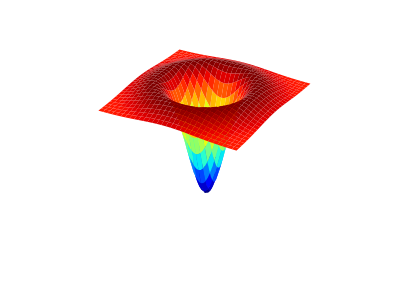

In [25]:
#Q1 - 3D plot
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

X, Y = np.meshgrid(np.arange(-hw, hw + 1, 1), np.arange(-hw, hw + 1, 1))

fig,ax = plt.subplots(figsize = (7,5))
ax1 = fig.add_subplot(111,projection='3d')
ax.axis("off")
surf1 = ax1.plot_surface(X,Y,log, cmap=cm.jet,linewidth=0, antialiased = True)
plt.axis('off')
plt.show()